In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


C:\Users\pga28\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 
EPOCHS = 5


In [4]:
df= tf.keras.preprocessing.image_dataset_from_directory(
     "PlantVillage",
       shuffle = True,
        image_size = (IMAGE_SIZE,IMAGE_SIZE),
        batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(df) # every element in dataset have batch of 32 so 32*68 = 2176

68

In [7]:
#every element is tensor so here we have to convert into numpy
for image_batch, label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0]


1)on obve output 32 is batch size and 256 is image size 
   3 is channel which is RGB
2) from 2nd line output we can see 0 for 'Potato___Early_blight'
  1 for 'Potato___Late_blight' ,2 for 'Potato___healthy'

In [8]:
for image_batch, label_batch in df.take(1):
    print(image_batch[0]) # its show tensor... [0]for 1st image

tf.Tensor(
[[[146. 148. 161.]
  [161. 163. 176.]
  [169. 171. 184.]
  ...
  [178. 182. 193.]
  [180. 184. 195.]
  [180. 184. 195.]]

 [[150. 152. 165.]
  [162. 164. 177.]
  [167. 169. 182.]
  ...
  [181. 185. 196.]
  [182. 186. 197.]
  [180. 184. 195.]]

 [[154. 156. 169.]
  [160. 162. 175.]
  [161. 163. 176.]
  ...
  [183. 187. 198.]
  [182. 186. 197.]
  [178. 182. 193.]]

 ...

 [[124. 122. 133.]
  [121. 119. 130.]
  [117. 115. 126.]
  ...
  [122. 124. 136.]
  [121. 123. 135.]
  [122. 124. 136.]]

 [[115. 113. 124.]
  [113. 111. 122.]
  [112. 110. 121.]
  ...
  [137. 139. 151.]
  [135. 137. 149.]
  [131. 133. 145.]]

 [[115. 113. 124.]
  [114. 112. 123.]
  [114. 112. 123.]
  ...
  [135. 137. 149.]
  [132. 134. 146.]
  [124. 126. 138.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in df.take(1):
    print(image_batch[0].numpy()) # convert tensor to numpy - 3D array 
# every number is represented by 0 to 255 because it represent color 

[[[185. 176. 179.]
  [186. 177. 180.]
  [189. 180. 183.]
  ...
  [183. 179. 180.]
  [190. 186. 187.]
  [198. 194. 195.]]

 [[186. 177. 180.]
  [184. 175. 178.]
  [186. 177. 180.]
  ...
  [193. 189. 190.]
  [186. 182. 183.]
  [183. 179. 180.]]

 [[180. 171. 174.]
  [177. 168. 171.]
  [178. 169. 172.]
  ...
  [193. 189. 190.]
  [190. 186. 187.]
  [189. 185. 186.]]

 ...

 [[128. 119. 122.]
  [129. 120. 123.]
  [132. 123. 126.]
  ...
  [142. 133. 138.]
  [144. 135. 140.]
  [149. 140. 145.]]

 [[131. 122. 125.]
  [129. 120. 123.]
  [129. 120. 123.]
  ...
  [134. 125. 130.]
  [132. 123. 128.]
  [135. 126. 131.]]

 [[134. 125. 128.]
  [129. 120. 123.]
  [125. 116. 119.]
  ...
  [134. 125. 130.]
  [134. 125. 130.]
  [138. 129. 134.]]]


In [10]:
for image_batch, label_batch in df.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


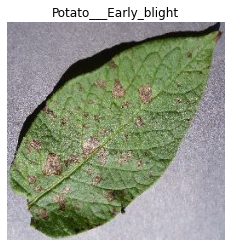

In [11]:
for image_batch , label_batch in df.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
    

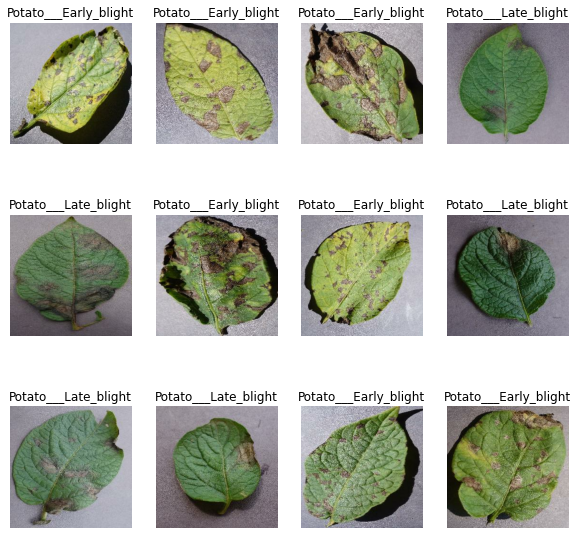

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
    

In [13]:
len(df)

68

In [14]:
# 80% = TRAINING
# 20% ==> 10% VALIDATION , 10% TEST

In [15]:
train_size = 0.8
len(df)*train_size

54.400000000000006

In [16]:
train_ds = df.take(54)
len(train_ds)

54

In [17]:
test_ds = df.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(df)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1 , test_split = 0.1, shuffle = True,shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed =12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(df)


In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
# this read the image fraom disk and then it will keep image in the memory
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
   layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
   layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])
# data augmentation it create same image horizontally,contrast,

In [29]:
# use CNN convolution neural network
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation= 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
    
])
model.build(input_shape=input_shape)

In [30]:
model.summary() # neural network architecture

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [31]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['accuracy'])

In [32]:
history = model.fit(
    train_ds,epochs= EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/5
54/54 [==============================] - 143s 2s/step - loss: 0.9024 - accuracy: 0.5417 - val_loss: 0.7944 - val_accuracy: 0.6302
Epoch 2/5
54/54 [==============================] - 119s 2s/step - loss: 0.6652 - accuracy: 0.7014 - val_loss: 0.7268 - val_accuracy: 0.7031
Epoch 3/5
54/54 [==============================] - 119s 2s/step - loss: 0.4541 - accuracy: 0.8056 - val_loss: 0.2893 - val_accuracy: 0.8646
Epoch 4/5
54/54 [==============================] - 118s 2s/step - loss: 0.2985 - accuracy: 0.8831 - val_loss: 0.1934 - val_accuracy: 0.9062
Epoch 5/5
54/54 [==============================] - 118s 2s/step - loss: 0.2668 - accuracy: 0.8976 - val_loss: 0.2663 - val_accuracy: 0.8698


In [33]:

scores = model.evaluate(test_ds)  #accuracy will be given

8/8 [==============================] - 6s 528ms/step - loss: 0.3454 - accuracy: 0.8398


In [34]:
scores  # scores is python list inwhich loss and accuracy value is given

[0.34538185596466064, 0.83984375]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
history.history['accuracy']

[0.5416666865348816,
 0.7013888955116272,
 0.8055555820465088,
 0.8831018805503845,
 0.8975694179534912]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'training and validation accuracy')

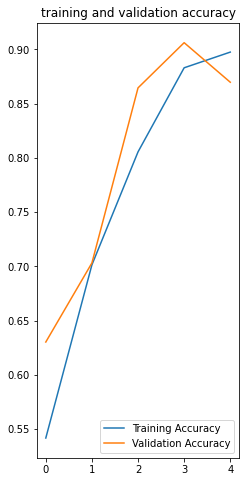

In [40]:
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label= 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title("training and validation accuracy")

Text(0.5, 1.0, 'training and validation loss')

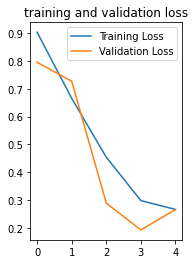

In [41]:
#plt.figure(figsize= (8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label= 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title("training and validation loss")

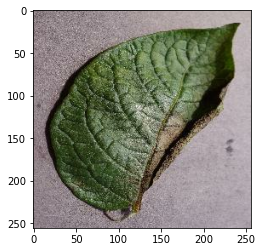

In [42]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
images actual label: Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Early_blight


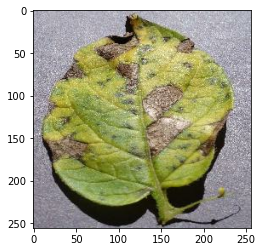

In [43]:
for image_batch,labels_batch in test_ds.take(1):
    
    first_image=image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print('images actual label:',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])]) 
    
    

In [44]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 67ms/step


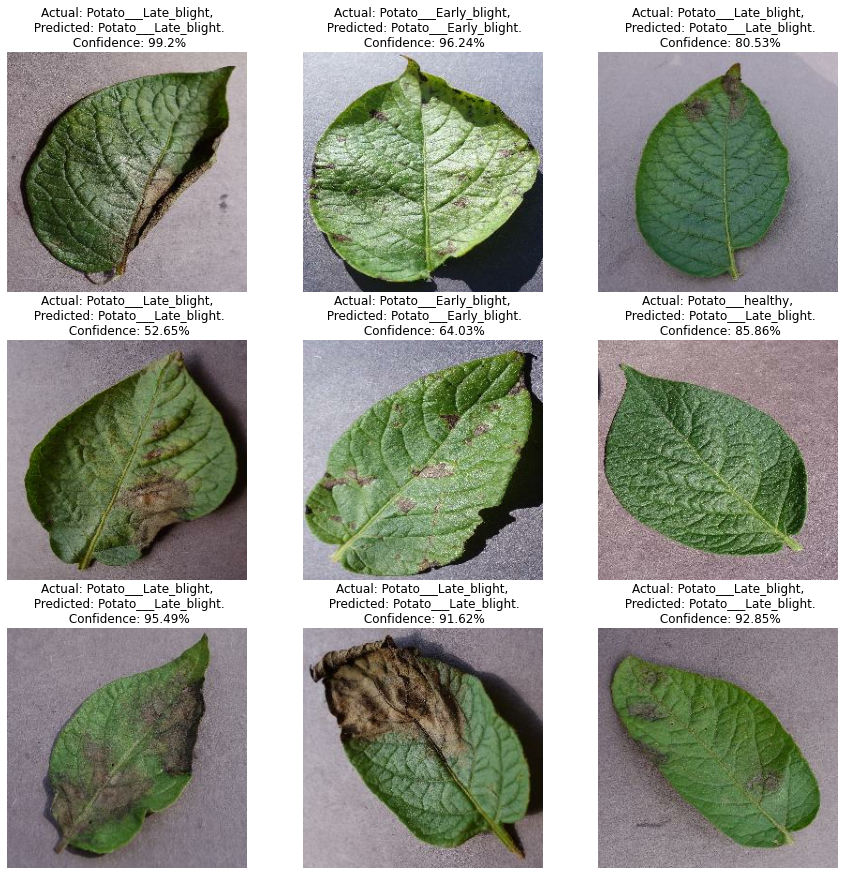

In [45]:
import numpy
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
    
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
    
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%" )
    
        plt.axis("off")

In [46]:
model_version=1
model.save(f"C:/Users/pga28/potato/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/pga28/potato/models/1\assets


INFO:tensorflow:Assets written to: C:/Users/pga28/potato/models/1\assets
